# **Prediction using Unsupervised ML**

# **GRIP - The Sparks Foundation**

## **KMEANS CLUSTERING**

Used Python Scikit Learn (Sklearn) Library to Build the Kmeans Model. 

### Goal/Task

1] Find the Optimum Number of Clusters? 

2] Representing the Clusters Visually

## **AUTHOR**

RACHIT AGARWAL [https://www.linkedin.com/in/racag/]

### IMPORTING THE LIBRARIES

In [1]:
# Libraries used for Data Manipulation, Analysis & Cleaning

import pandas as pd
import numpy as np

# Data Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

### LOADING DATA

In [2]:
df = pd.read_csv('Iris.csv', index_col  = 0)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Shape of the data

df.shape

(150, 5)

In [4]:
# Structure of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
# Checking for Missing Values

df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
# Descriptive Statistics

df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### EXPLORATORY DATA ANALYSIS

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


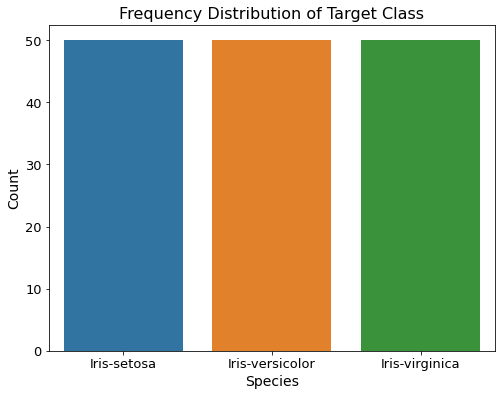

In [7]:
# Frequency Distribution of Target Class

print(df['Species'].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(df['Species']);
plt.title('Frequency Distribution of Target Class', fontsize = 16)
plt.xlabel('Species', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

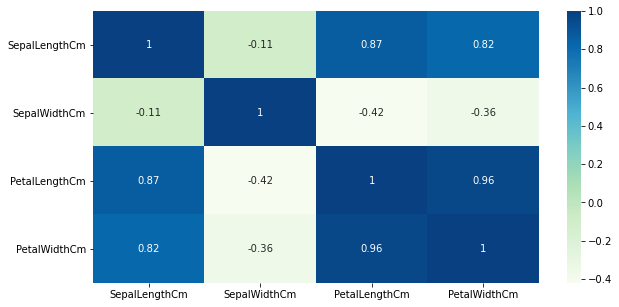

In [8]:
# Correlation between the Variables

plt.figure(figsize = (10,5))
sns.heatmap(df.iloc[:,:-1].corr(), cmap = 'GnBu', annot = True)

### KMEANS CLUSTERING

In [9]:
X = df.iloc[:,:-1].values

In [10]:
# Elbow Method to find the Optimum Number of Clusters

from sklearn.cluster import KMeans
wsse = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(X)
    
    # within cluster sum of squared error values
    wsse.append(kmeans.inertia_)

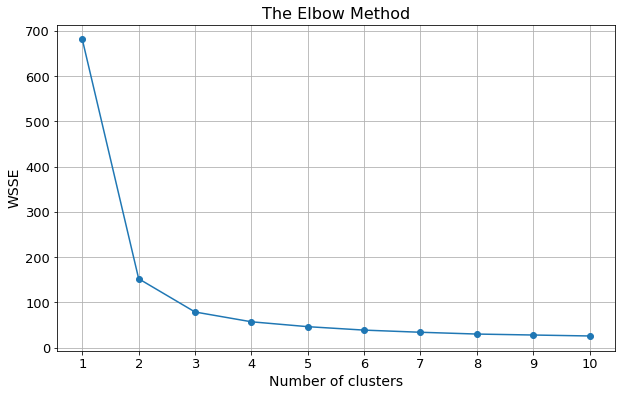

In [11]:
plt.figure(figsize = (10,6))
plt.plot(range(1,11), wsse, marker = 'o')

plt.title('The Elbow Method', fontsize = 16)
plt.xlabel('Number of clusters', fontsize = 14)
plt.ylabel('WSSE', fontsize = 14)

plt.xticks(range(1,11),fontsize = 13)
plt.yticks(fontsize = 13)

plt.grid()
plt.show()

#### From the Above graph we can clearly see the Elbow formation at 2 and 3, So selecting 3 as optimum Number of Clusters

In [12]:
km = KMeans(n_clusters = 3, random_state = 10)
km.fit(X)
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [13]:
# Number of Iterations performed

km.n_iter_

5

In [14]:
# Cluster Centers

km.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.418     , 1.464     , 0.244     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [15]:
# Within Cluster Sum of Squared Error Value

km.inertia_

78.94084142614601

In [16]:
# Adding the predictions to the dataframe  

df1 = df.copy()
df1['Predicted_Species'] = km.labels_

In [17]:
# Function to Plot the clusters 

def cluster_plot(x,y):
    plt.figure(figsize = (12,6))

    for i in range(0,km.n_clusters):
        plt.scatter(x, y, cmap = 'tab10_r', 
                    data= df1[df1['Predicted_Species'] == i],
                    s = 100, label = i)

    if x == 'SepalLengthCm' and y == 'SepalWidthCm':
        a = 0
        b = 1
    else:
        a = 2
        b = 3
    
    plt.scatter(km.cluster_centers_[:, a], km.cluster_centers_[:, b],
                s = 550, c = 'red', marker = '*', label = 'Centeroid')

    plt.title('Predicted Clusters', fontsize = 16)
    plt.xlabel(x, fontsize = 14)
    plt.ylabel(y, fontsize = 14)

    plt.xticks(fontsize = 13)
    plt.yticks(fontsize = 13)

    plt.legend(loc = 0,fontsize = 12)
    plt.show()

### VISUALIZING CLUSTERS WITH  SEPAL LENGTH & WIDTH

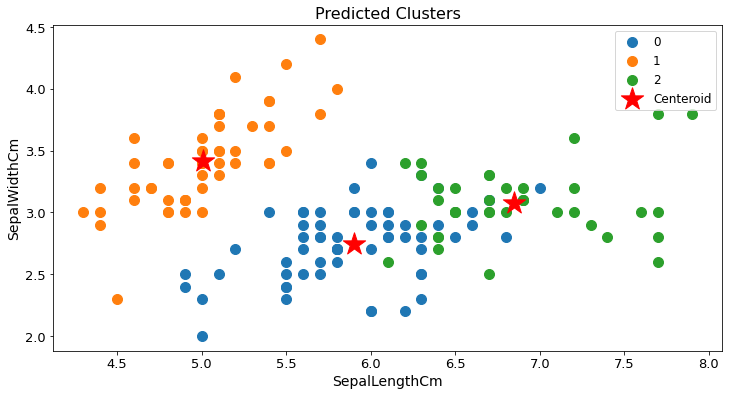

In [18]:
cluster_plot('SepalLengthCm','SepalWidthCm')

### VISUALIZING CLUSTERS WITH PETAL LENGTH & WIDTH

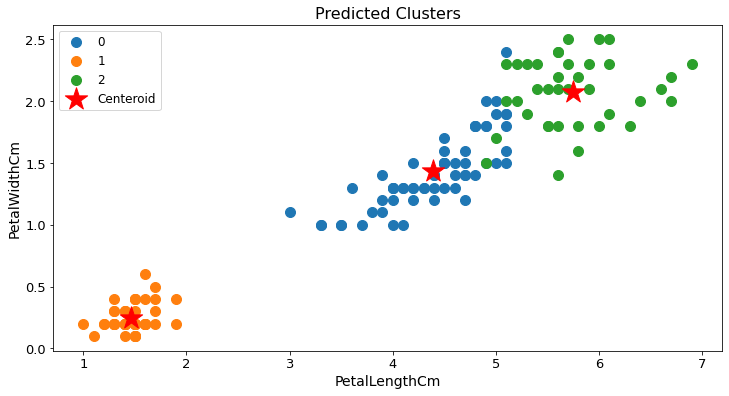

In [19]:
cluster_plot('PetalLengthCm','PetalWidthCm')

### SINCE THE SPECIES WERE ALREADY GIVEN WE CAN PERFORM THE CLUSTER EVALUATION

0    62
1    50
2    38
Name: Predicted_Species, dtype: int64


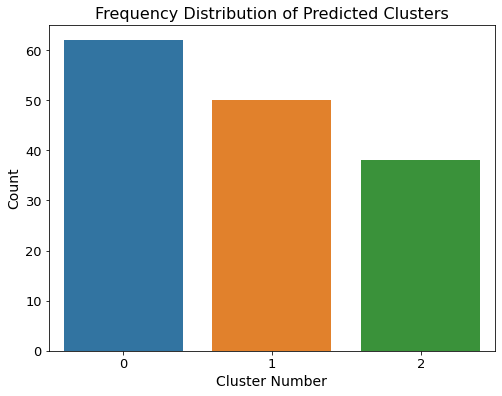

In [20]:
# Frequency Distribution of Predicted Clusters

print(df1['Predicted_Species'].value_counts())

plt.figure(figsize = (8,6))
sns.countplot(df1['Predicted_Species']);
plt.title('Frequency Distribution of Predicted Clusters', fontsize = 16)
plt.xlabel('Cluster Number', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)

plt.show()

In [21]:
# Finding the Errors

for i in df1['Species'].value_counts().index:
    
    print(i,'\n',df1.loc[df1['Species'] == i]['Predicted_Species'].value_counts(),'\n')

Iris-virginica 
 2    36
0    14
Name: Predicted_Species, dtype: int64 

Iris-setosa 
 1    50
Name: Predicted_Species, dtype: int64 

Iris-versicolor 
 0    48
2     2
Name: Predicted_Species, dtype: int64 



#### Since we can see that for Iris-versicolor the majority prediction is cluster 0
#### For Iris-setosa it is cluster 1 while for Iris-virginica it is cluster 2

In [22]:
# Mapping to the cluster number based on majority prediction

df1['Actual_Species'] = df1['Species'].map({'Iris-versicolor':0, 'Iris-setosa':1, 'Iris-virginica':2})
df1.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted_Species,Actual_Species
Id,,,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa,1,1
2,4.9,3.0,1.4,0.2,Iris-setosa,1,1
3,4.7,3.2,1.3,0.2,Iris-setosa,1,1
4,4.6,3.1,1.5,0.2,Iris-setosa,1,1
5,5.0,3.6,1.4,0.2,Iris-setosa,1,1


### Cluster Evaluation

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df1['Actual_Species'], df1['Predicted_Species']),'\n\n')
print('Classification Report\n\n0 -> Iris-versicolor\n1 -> Iris-setosa\n2 -> Iris-virginica\n')
print(classification_report(df1['Actual_Species'], df1['Predicted_Species']))

[[48  0  2]
 [ 0 50  0]
 [14  0 36]] 


Classification Report

0 -> Iris-versicolor
1 -> Iris-setosa
2 -> Iris-virginica

              precision    recall  f1-score   support

           0       0.77      0.96      0.86        50
           1       1.00      1.00      1.00        50
           2       0.95      0.72      0.82        50

    accuracy                           0.89       150
   macro avg       0.91      0.89      0.89       150
weighted avg       0.91      0.89      0.89       150

